In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [3]:
character_1best_files = []
token_1best_files = []
node_1best_files = []

character_2mid_files = []
token_2mid_files = []
node_2mid_files = []

character_3mid_files = []
token_3mid_files = []
node_3mid_files = []

character_4worst_files = []
token_4worst_files = []
node_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
node_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
node_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"


character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
node_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"


character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
node_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"


for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_1best_file_path):
    for filename in filenames:
        node_1best_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_2mid_file_path):
    for filename in filenames:
        node_2mid_files.append(os.path.join(parent, filename))        
  


for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_3mid_file_path):
    for filename in filenames:
        node_3mid_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(node_4worst_file_path):
    for filename in filenames:
        node_4worst_files.append(os.path.join(parent, filename))        

In [4]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[int(num) for num in line.split(',') if num != "\n"][:154] for line in f ]
        matrixList.append(np.array(matrix))

In [6]:
#best1_input_chars = []
#matrixFileToMatrix(character_1best_files[1:2], best1_input_chars)

In [7]:
#len(best1_input_chars[0])

In [5]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)
matrixFileToMatrix(node_1best_files, best1_input_nodes)

print("done")

#matrixFileToMatrix(character_2mid_files, mid2_input_chars)
#matrixFileToMatrix(token_2mid_files, mid2_input_tokens)
#matrixFileToMatrix(node_2mid_files, mid2_input_nodes)

print("done")

#matrixFileToMatrix(character_3mid_files, mid3_input_chars)
#matrixFileToMatrix(token_3mid_files, mid3_input_tokens)
#matrixFileToMatrix(node_3mid_files, mid3_input_nodes)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)
matrixFileToMatrix(node_4worst_files, worst4_input_nodes)

done
done
done


# Stacked Matrices

In [6]:
best1_input_stack = []
#mid2_input_stack = []
#mid3_input_stack = []
worst4_input_stack = []

print(np.array(best1_input_tokens[0]).shape)

for char_array, token_array, node_array in zip(best1_input_chars, best1_input_tokens, best1_input_nodes):
    best1_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)],axis=-1))
    
      
#for char_array, token_array, node_array in zip(mid2_input_chars, mid2_input_tokens, mid2_input_nodes):
 #   mid2_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)], axis=-1))

#for char_array, token_array, node_array in zip(mid3_input_chars, mid3_input_tokens, mid3_input_nodes):
 #   mid3_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)],axis=-1))
    
      
for char_array, token_array, node_array in zip(worst4_input_chars, worst4_input_tokens, worst4_input_nodes):
    worst4_input_stack.append(np.stack([np.array(char_array), np.array(token_array), np.array(node_array)], axis=-1))

(496, 154)


In [7]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

In [8]:
input4stack_x = []
input4stack_y = []

for x in best1_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,1])

#for x in mid2_input_stack:
 #   input4stack_x.append(x)
  #  input4stack_y.append([0,0,1,0])
    
#for x in mid3_input_stack:
 #   input4stack_x.append(x)
  #  input4stack_y.append([0,1,0,0])

for x in worst4_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([1,0])

In [9]:
best1_input_stack = []
mid2_input_stack = []
mid3_input_stack = []
worst4_input_stack = []

In [10]:
input4stack_x = np.array(input4stack_x)
input4stack_y = np.array(input4stack_y)

In [11]:
print(input4stack_x.shape)
print(input4stack_y.shape)

(3587, 496, 154, 3)
(3587, 2)


In [12]:
input4stack_x, input4stack_y = shuffle(input4stack_x, input4stack_y, random_state=0)

In [13]:
x_train4s, x_test4s, y_train4s, y_test4s = train_test_split(input4stack_x, input4stack_y, test_size = 0.2, random_state=24)

In [14]:
input4stack_x = []
input4stack_y = []

In [17]:
batch_size = 64
epochs = 6

model4s = Sequential()
model4s.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 strides=(2,2),
                 input_shape=(496,154,3)))
model4s.add(Conv2D(64, (6, 6), strides=(2,2), activation='relu'))
model4s.add(MaxPooling2D(pool_size=(2, 2)))
model4s.add(Dropout(0.25))
model4s.add(Flatten())
model4s.add(Dense(128, activation='relu'))
model4s.add(Dropout(0.5))
model4s.add(Dense(2, activation='softmax'))

print(model4s.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 246, 75, 32)       3488      
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 35, 64)       73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 17, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 60, 17, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 65280)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8355968   
                                                      

In [18]:
model4s.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model4s.fit(x_train4s, y_train4s,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test4s, y_test4s))
score4s = model4s.evaluate(x_test4s, y_test4s, verbose=0)
print('Test loss:', score4s[0])
print('Test accuracy:', score4s[1])

Epoch 1/6
45/45 [==============================] - 56s 1s/step - loss: 3.6739 - accuracy: 0.9477 - val_loss: 0.0852 - val_accuracy: 0.9777
Epoch 2/6
45/45 [==============================] - 59s 1s/step - loss: 0.0437 - accuracy: 0.9888 - val_loss: 0.0554 - val_accuracy: 0.9847
Epoch 3/6
45/45 [==============================] - 59s 1s/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0532 - val_accuracy: 0.9903
Epoch 4/6
45/45 [==============================] - 61s 1s/step - loss: 0.0282 - accuracy: 0.9899 - val_loss: 0.0826 - val_accuracy: 0.9819
Epoch 5/6
45/45 [==============================] - 65s 1s/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0652 - val_accuracy: 0.9847
Epoch 6/6
45/45 [==============================] - 76s 2s/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.0607 - val_accuracy: 0.9847
Test loss: 0.06069560721516609
Test accuracy: 0.984679639339447


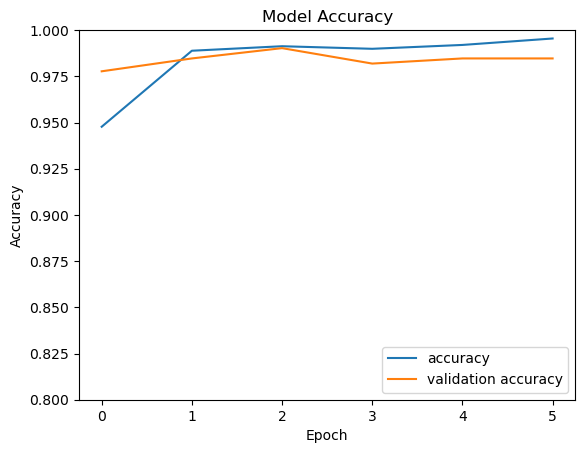

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

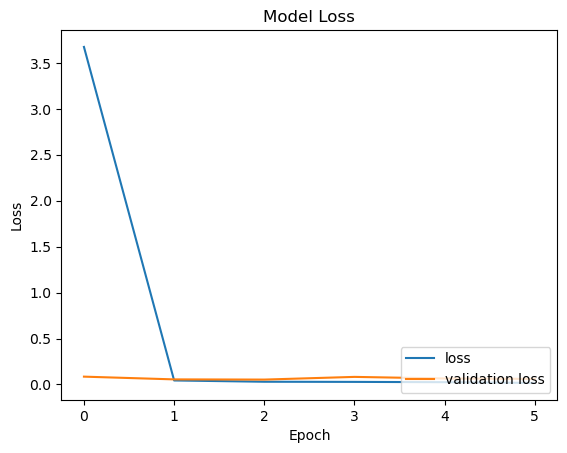

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [22]:
new_predict4 = model4s.predict(x_test4s)

23/23 [==============================] - 3s 132ms/step


In [23]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_test4s, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[221   5]
 [  6 486]]


# Single Models

In [6]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1])

#for x in mid2_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,0,1,0])
    
#for x in mid3_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,1])

#for x in mid2_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,0,1,0])

#for x in mid3_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0])
    
    
    
    
    
for x in best1_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,1])

#for x in mid2_input_nodes:
    #input4_nodes_x.append(x)
    #input4_nodes_y.append([0,0,1,0])

#for x in mid3_input_nodes:
 #   input4_nodes_x.append(x)
  #  input4_nodes_y.append([0,1,0,0])

for x in worst4_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([1,0])

In [7]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

In [8]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

input4_nodes_x = np.array(input4_nodes_x)
input4_nodes_y = np.array(input4_nodes_y)

In [9]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

print(input4_nodes_x.shape)
print(input4_nodes_y.shape)

(3587, 496, 154)
(3587, 2)
(3587, 496, 154)
(3587, 2)
(3587, 496, 154)
(3587, 2)


In [10]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

input4_nodes_x, input4_nodes_y = shuffle(input4_nodes_x, input4_nodes_y, random_state=0)

In [11]:
x_characters_train, x_characters_test, y_characters_train, y_characters_test = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

x_tokens_train, x_tokens_test, y_tokens_train, y_tokens_test = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

x_nodes_train, x_nodes_test, y_nodes_train, y_nodes_test = train_test_split(
    input4_nodes_x, input4_nodes_y, test_size = 0.2, random_state=24)

In [12]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

In [23]:
batch_size = 64
epochs = 6

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 strides=(2,2),
                 input_shape=(496,154,1)))
model4.add(Conv2D(64, (6, 6), strides=(2,2), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 246, 75, 32)       1184      
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 35, 64)       73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 17, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 60, 17, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 65280)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                4177984   
                                                      

In [24]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Character Model

In [15]:
character_fit = model4.fit(x_characters_train, y_characters_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test, y_characters_test))
character_score = model4.evaluate(x_characters_test, y_characters_test, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
45/45 [==============================] - 74s 2s/step - loss: 0.4397 - accuracy: 0.9672 - val_loss: 0.0573 - val_accuracy: 0.9819
Epoch 2/6
45/45 [==============================] - 66s 1s/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0773 - val_accuracy: 0.9889
Epoch 3/6
45/45 [==============================] - 65s 1s/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0966 - val_accuracy: 0.9889
Epoch 4/6
45/45 [==============================] - 65s 1s/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.1010 - val_accuracy: 0.9889
Epoch 5/6
45/45 [==============================] - 63s 1s/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.1055 - val_accuracy: 0.9875
Epoch 6/6
45/45 [==============================] - 62s 1s/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0944 - val_accuracy: 0.9833
Test loss: 0.09441544860601425
Test accuracy: 0.9832869172096252


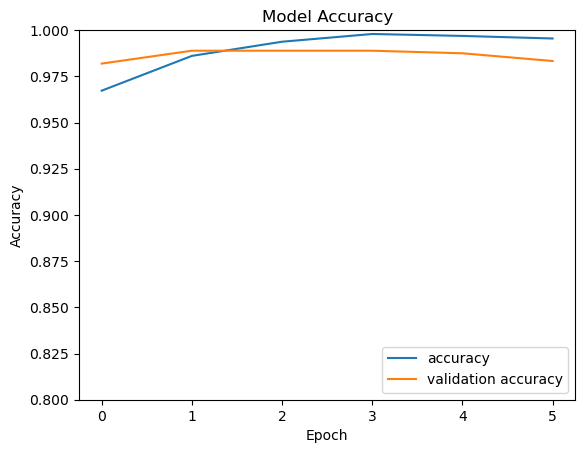

In [21]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

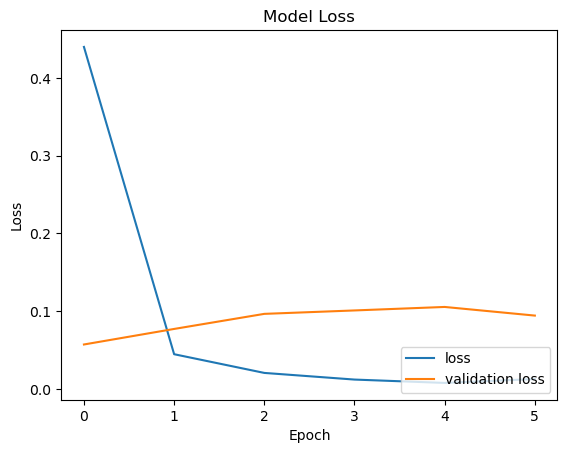

In [22]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [18]:
new_predict4 = model4.predict(x_characters_test)

23/23 [==============================] - 4s 178ms/step


In [20]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[220   6]
 [  6 486]]


# Token Model

In [25]:
token_fit = model4.fit(x_tokens_train, y_tokens_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test, y_tokens_test))
token_score = model4.evaluate(x_tokens_test, y_tokens_test, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
45/45 [==============================] - 63s 1s/step - loss: 0.6394 - accuracy: 0.9658 - val_loss: 0.1168 - val_accuracy: 0.9903
Epoch 2/6
45/45 [==============================] - 69s 2s/step - loss: 0.0422 - accuracy: 0.9895 - val_loss: 0.0481 - val_accuracy: 0.9875
Epoch 3/6
45/45 [==============================] - 65s 1s/step - loss: 0.0384 - accuracy: 0.9913 - val_loss: 0.0447 - val_accuracy: 0.9916
Epoch 4/6
45/45 [==============================] - 62s 1s/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0548 - val_accuracy: 0.9903
Epoch 5/6
45/45 [==============================] - 60s 1s/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0492 - val_accuracy: 0.9903
Epoch 6/6
45/45 [==============================] - 62s 1s/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0681 - val_accuracy: 0.9903
Test loss: 0.06813037395477295
Test accuracy: 0.9902507066726685


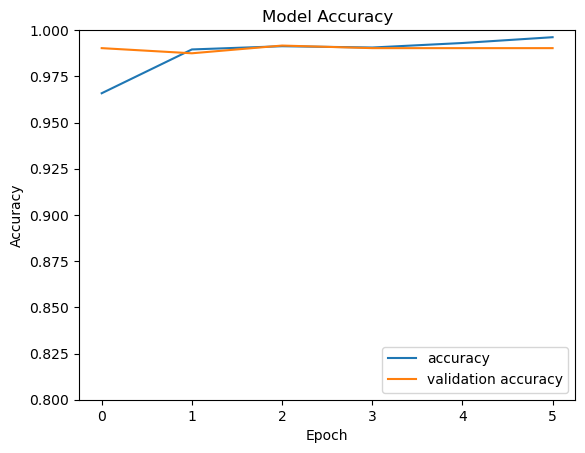

In [30]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

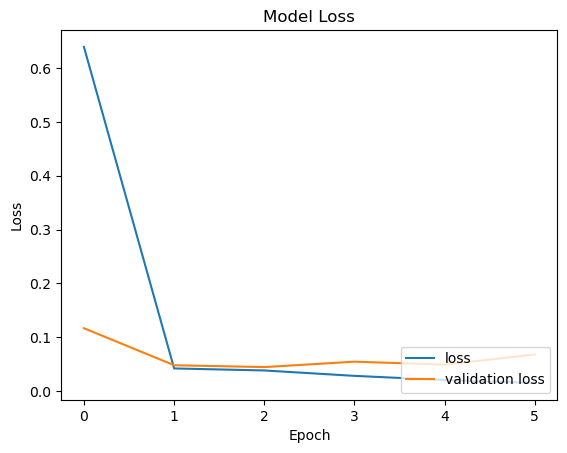

In [31]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [28]:
new_predict4 = model4.predict(x_tokens_test)

23/23 [==============================] - 4s 168ms/step


In [29]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_tokens_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[225   1]
 [  6 486]]


# Node Model

In [36]:
batch_size = 64
epochs = 6

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 strides=(2,2),
                 input_shape=(496,154,1)))
model4.add(Conv2D(64, (9, 9), strides=(2,2), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 244, 73, 32)       2624      
                                                                 
 conv2d_7 (Conv2D)           (None, 118, 33, 64)       165952    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 59, 16, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 60416)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                3866688   
                                                      

In [37]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
node_fit = model4.fit(x_nodes_train, y_nodes_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_nodes_test, y_nodes_test))
node_score = model4.evaluate(x_nodes_test, y_nodes_test, verbose=0)
print('Test loss:', node_score[0])
print('Test accuracy:', node_score[1])

Epoch 1/6
45/45 [==============================] - 108s 2s/step - loss: 2.8525 - accuracy: 0.9035 - val_loss: 0.1099 - val_accuracy: 0.9666
Epoch 2/6
45/45 [==============================] - 117s 3s/step - loss: 0.1448 - accuracy: 0.9526 - val_loss: 0.1089 - val_accuracy: 0.9666
Epoch 3/6
45/45 [==============================] - 123s 3s/step - loss: 0.1375 - accuracy: 0.9536 - val_loss: 0.1141 - val_accuracy: 0.9610
Epoch 4/6
45/45 [==============================] - 125s 3s/step - loss: 0.1304 - accuracy: 0.9554 - val_loss: 0.1221 - val_accuracy: 0.9680
Epoch 5/6
45/45 [==============================] - 111s 2s/step - loss: 0.1273 - accuracy: 0.9568 - val_loss: 0.1056 - val_accuracy: 0.9680
Epoch 6/6
45/45 [==============================] - 115s 3s/step - loss: 0.1134 - accuracy: 0.9578 - val_loss: 0.1183 - val_accuracy: 0.9652
Test loss: 0.11831249296665192
Test accuracy: 0.9651810526847839


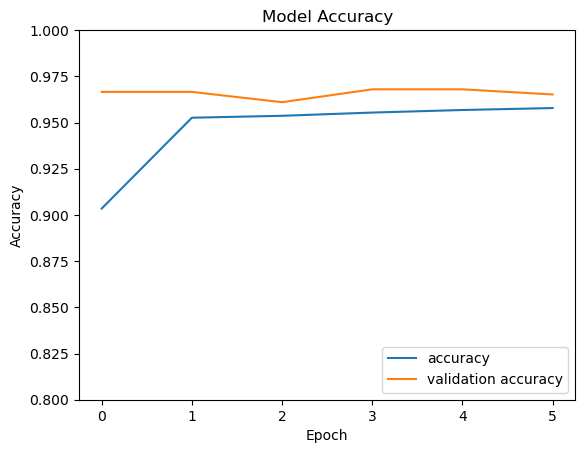

In [43]:
plt.plot(node_fit.history['accuracy'], label='accuracy')
plt.plot(node_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

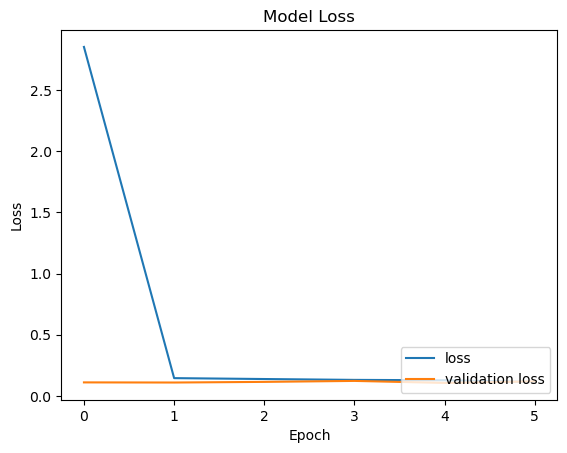

In [40]:
plt.plot(node_fit.history['loss'], label='loss')
plt.plot(node_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [41]:
new_predict4 = model4.predict(x_nodes_test)

23/23 [==============================] - 7s 324ms/step


In [42]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_nodes_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[225   1]
 [ 24 468]]


# Combined Model

In [47]:
batch_size = 64
epochs = 6

model_chars_input = Input((496,154,1))

model_chars = Conv2D(32, kernel_size=(6, 6), strides=(2,2),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(64, (6, 6), strides=(2,2), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_chars)
model_chars = Dropout(0.25)(model_chars)
model_chars = Flatten()(model_chars)
model_chars = Dense(16, activation='relu')(model_chars)
model_chars = Dropout(0.5)(model_chars)

model_tokens_input = Input((496,154,1))

model_tokens = Conv2D(32, kernel_size=(6, 6), strides=(2,2),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(64, (6, 6), strides=(2,2), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_tokens)
model_tokens = Dropout(0.25)(model_tokens)
model_tokens = Flatten()(model_tokens)
model_tokens = Dense(16, activation='relu')(model_tokens)
model_tokens = Dropout(0.5)(model_tokens)

model_nodes_input = Input((496,154,1))

model_nodes = Conv2D(32, kernel_size=(9, 9), strides=(2,2),
                 activation='relu')(model_nodes_input)
model_nodes = Conv2D(64, (9, 9), strides=(2,2), activation='relu')(model_nodes)
model_nodes = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_nodes)
model_nodes = Dropout(0.25)(model_nodes)
model_nodes = Flatten()(model_nodes)
model_nodes = Dense(16, activation='relu')(model_nodes)
model_nodes = Dropout(0.5)(model_nodes)

merged = Concatenate()([model_chars, model_tokens, model_nodes])
merged = Dense(8, activation='relu')(merged)
merged = Dense(2, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input, model_nodes_input], outputs=[merged])

print(model_combined4.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_5 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                          

In [48]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
combined4_fit = model_combined4.fit([x_characters_train, x_tokens_train, x_nodes_train], y_characters_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test, x_tokens_test, x_nodes_test], y_characters_test))
combined4_score = model_combined4.evaluate([x_characters_test, x_tokens_test, x_nodes_test], y_characters_test, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
45/45 [==============================] - 255s 6s/step - loss: 0.5748 - accuracy: 0.9470 - val_loss: 0.0990 - val_accuracy: 0.9903
Epoch 2/6
45/45 [==============================] - 251s 6s/step - loss: 0.0851 - accuracy: 0.9784 - val_loss: 0.0417 - val_accuracy: 0.9903
Epoch 3/6
45/45 [==============================] - 244s 5s/step - loss: 0.0396 - accuracy: 0.9847 - val_loss: 0.0426 - val_accuracy: 0.9903
Epoch 4/6
45/45 [==============================] - 242s 5s/step - loss: 0.0429 - accuracy: 0.9854 - val_loss: 0.0614 - val_accuracy: 0.9833
Epoch 5/6
45/45 [==============================] - 257s 6s/step - loss: 0.0332 - accuracy: 0.9861 - val_loss: 0.0689 - val_accuracy: 0.9903
Epoch 6/6
45/45 [==============================] - 221s 5s/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0513 - val_accuracy: 0.9903
Test loss: 0.051288019865751266
Test accuracy: 0.9902507066726685


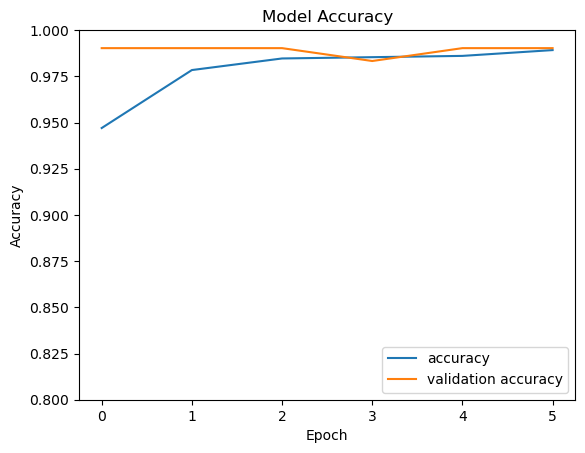

In [56]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

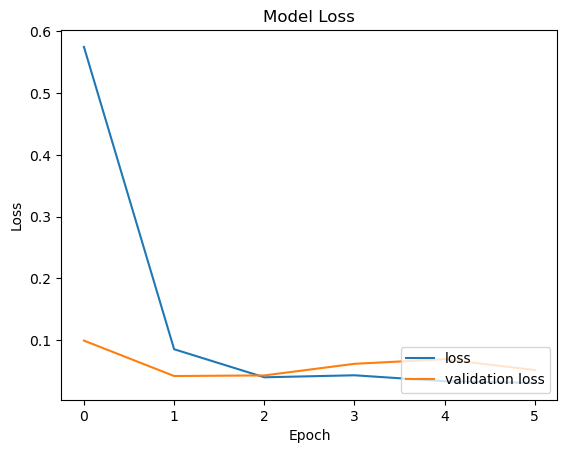

In [57]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [58]:
new_predict4 = model_combined4.predict([x_characters_test, x_tokens_test, x_nodes_test])

23/23 [==============================] - 12s 504ms/step


In [59]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[225   1]
 [  6 486]]
